## Multiple Linear Regression

## 1

In [1]:
import pandas as pd

data = pd.read_csv("insurance.csv")
data['sex'] = data['sex'].astype('category').cat.codes
data['smoker'] = data['smoker'].astype('category').cat.codes
data['region'] = data['region'].astype('category').cat.codes
print(data.head())


   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


## 2

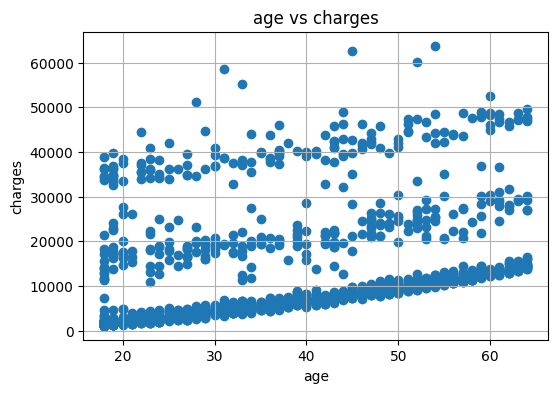

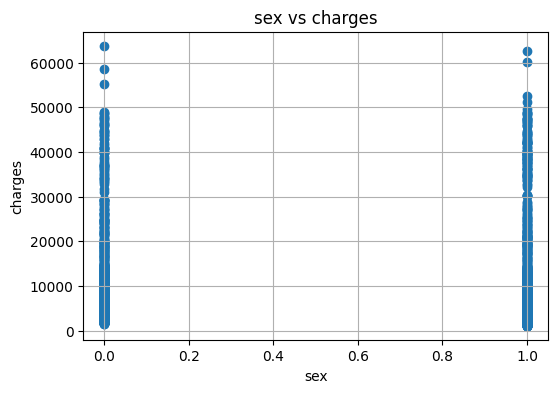

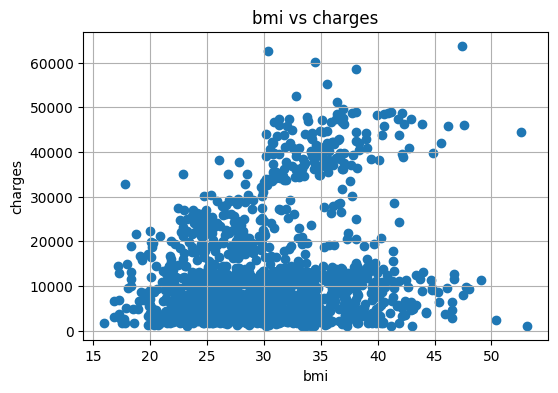

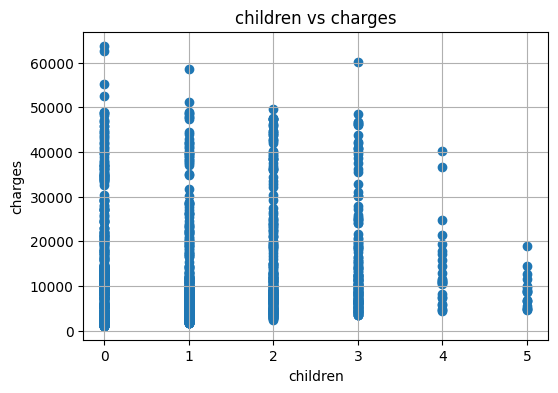

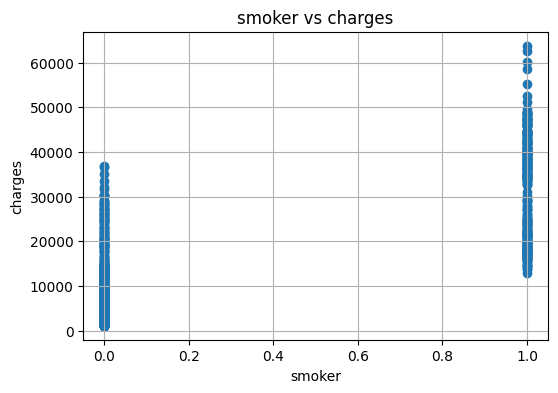

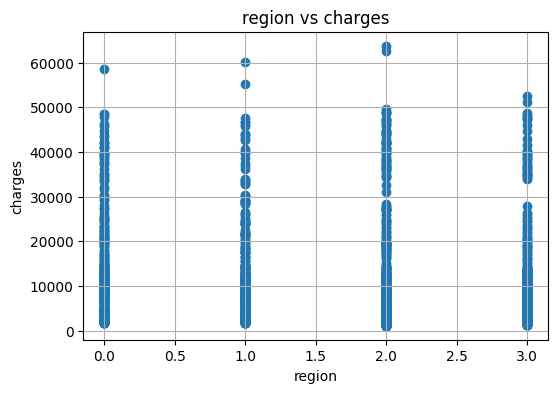

In [2]:
import matplotlib.pyplot as plt

features = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
target = 'charges'

for feature in features:
    plt.figure(figsize=(6, 4))
    plt.scatter(data[feature], data[target])
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs {target}')
    plt.grid(True)
    plt.show()


## 3

In [3]:
from sklearn.model_selection import train_test_split

x_data = data.drop('charges', axis=1)
y_data = data['charges']

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

print(f"Train set: {x_train.shape}, Validation set: {x_val.shape}")


Train set: (1070, 6), Validation set: (268, 6)


## 4

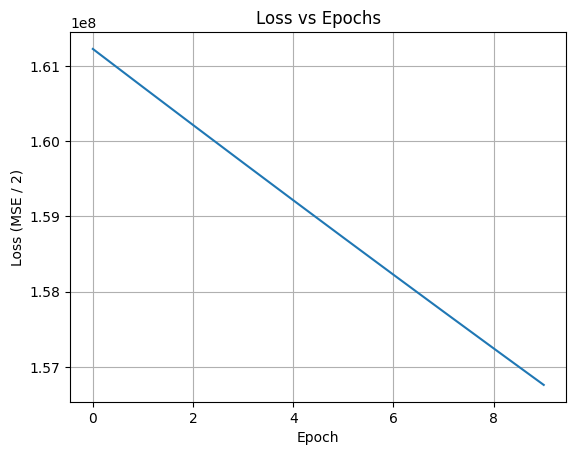

Weight-uri finale: [0.13187391 5.66102606 0.07095081 4.17236618 0.15651679 0.06499673
 0.1988745 ]


In [4]:
import numpy as np
import matplotlib.pyplot as plt

X = x_train.values
y = y_train.values

X = np.c_[np.ones(X.shape[0]), X]
w = np.zeros(X.shape[1])
learning_rate = 0.000001
epochs = 10
loss_history = []

for i in range(epochs):
    y_pred = X @ w
    error = y_pred - y
    loss = (error ** 2).mean() / 2
    loss_history.append(loss)
    gradient = X.T @ error / X.shape[0]
    w -= learning_rate * gradient

plt.plot(range(epochs), loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE / 2)')
plt.title('Loss vs Epochs')
plt.grid(True)
plt.show()

print("Weight-uri finale:", w)


## 5

In [5]:
from sklearn.metrics import r2_score

X_train = np.c_[np.ones(x_train.shape[0]), x_train.values]
X_val = np.c_[np.ones(x_val.shape[0]), x_val.values]

y_pred_train = X_train @ w
y_pred_val = X_val @ w

r2_train = r2_score(y_train, y_pred_train)
r2_val = r2_score(y_val, y_pred_val)

print(f"R2 pe train: {r2_train}")
print(f"R2 pe validation: {r2_val}")


R2 pe train: -1.1655031758417627
R2 pe validation: -1.0203261235447418


## 6

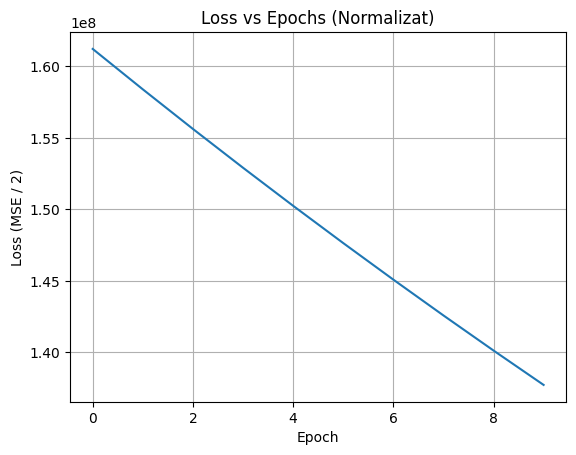

R2 pe train (normalizat): -0.8755836190008306
R2 pe validation (normalizat): -0.7454728553115675


In [6]:
mean = x_train.mean()
std = x_train.std()

x_train_norm = (x_train - mean) / std
x_val_norm = (x_val - mean) / std

X_norm = np.c_[np.ones(x_train_norm.shape[0]), x_train_norm.values]
y = y_train.values

w = np.zeros(X_norm.shape[1])
learning_rate = 0.01
epochs = 10
loss_history = []

for i in range(epochs):
    y_pred = X_norm @ w
    error = y_pred - y
    loss = (error ** 2).mean() / 2
    loss_history.append(loss)
    gradient = X_norm.T @ error / X_norm.shape[0]
    w -= learning_rate * gradient

plt.plot(range(epochs), loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE / 2)')
plt.title('Loss vs Epochs (Normalizat)')
plt.grid(True)
plt.show()

X_train_norm = np.c_[np.ones(x_train_norm.shape[0]), x_train_norm.values]
X_val_norm = np.c_[np.ones(x_val_norm.shape[0]), x_val_norm.values]

y_pred_train = X_train_norm @ w
y_pred_val = X_val_norm @ w

r2_train = r2_score(y_train, y_pred_train)
r2_val = r2_score(y_val, y_pred_val)

print(f"R2 pe train (normalizat): {r2_train}")
print(f"R2 pe validation (normalizat): {r2_val}")


## 7

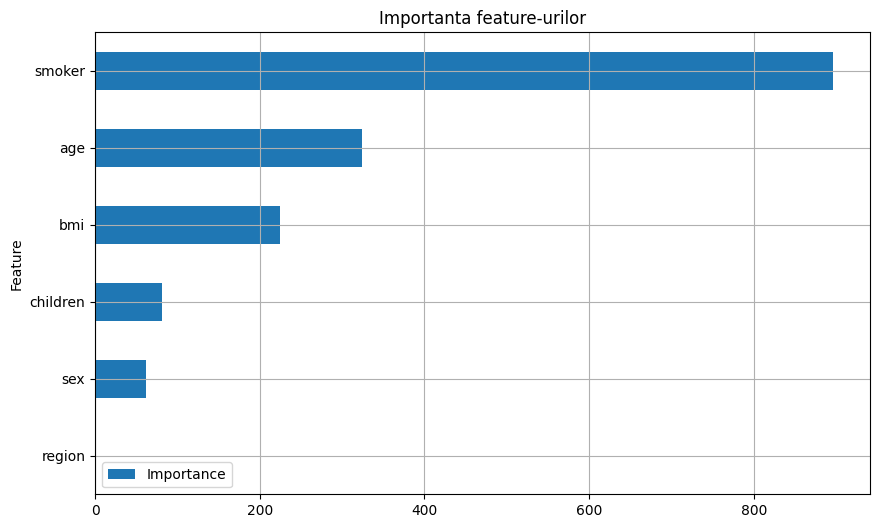

In [7]:
import copy
import pandas as pd

coefficients = copy.deepcopy(w[1:])

feature_importance = pd.DataFrame({
    'Feature': x_train.columns.values,
    'Importance': np.abs(coefficients)
})

feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.title('Importanta feature-urilor')
plt.grid(True)
plt.show()
